# Step34, sin 함수 고차 미분 

지금까지 고차 미분에 대응하는 함수들(Add, Mul, Neg, Sub, Div, Pow 클래스)

이번 단계에서는 새로운 DeZero 함수 몇개를 추가로 구현한다.  
앞으로 나오는 새로운 DeZero 함수는 dezero/functions.py에 추가한다.

## 34.1 sin 함수 구현 

수식  
$y=sin(x)$ 일 때  
$\frac{\partial y}{\partial x} = cos(x)$

In [1]:
import numpy as np 
from dezero.core import Function 

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x, = self.inputs
        gx = gy * cos(x)    # 1

def sin(x):
    return Sin()(x)

backward 메서드 안의 모든 변수는 Variable 인스턴스이다.(forward 메서드 안의 변수는 ndarray 인스턴스이다.)  
1의 cos(x)는 DeZero의 cos 함수이다.  
이는 Sin 클래스를 구현하려면 Cos 클래스와 cos 함수가 필요하다는 뜻이다.

backward 메서드 구현시 모든 계산은 반드시 DeZero 함수를 사용해야한다. 만약 해당하는 DeZero 함수가 없다면 새로 구현해야한다.

## 34.2 cos 함수 구현 

Cos 클래스와 cos 함수를 구현 

수식  
$y = cos(x)$ 일 때,  
$\frac{\partial y}{\partial x} = -sin(x)$

In [2]:
class Cos(Function):
    def forward(self, x):
        y = np.cos(x)
        return y 
    
    def backward(self, gy):
        x, = self.inputs
        gx = gy * -sin(x)
        return gx 

    def cos(x):
        return Cos()(x)

이번에도 backward 메서드에 주목  
backward에서의 구체적인 계산으로 sin 함수를 사용  
이미 sin 함수를 구현했었음  

이것으로 DeZero의 sin 함수와 cos 함수의 구현이 끝남

(위 코드들은 dezero폴더의 functions.py에 넣자.)

## 34.3 sin 함수 고차 미분 

sin 함수의 고차 미분

In [1]:
import numpy as np 
from dezero import Variable
import dezero.functions as F 

x = Variable(np.array(1.0))
y = F.sin(x)
y.backward(create_graph=True)   # 역전파 계산에 대해서도 계산 그래프를 만들게 한다.

for i in range(3):
    gx = x.grad         # gx에 1차 x미분값
    x.cleargrad()       # x를 다시 초기화하고 
    gx.backward(create_graph=True)  # 2차 미분 
    print(x.grad)       # n차 미분

variable(-0.8414709848078965)
variable(-0.5403023058681398)
variable(0.8414709848078965)


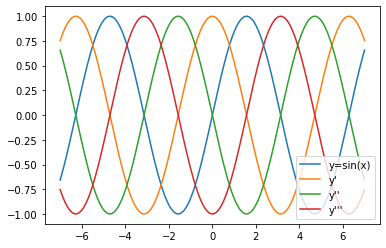

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from dezero import Variable
import dezero.functions as F 

x = Variable(np.linspace(-7,7,200)) # -7부터 7까지 균일하게 200등분한 배열
y = F.sin(x)
y.backward(create_graph=True)

logs = [y.data]

for i in range(3):
    logs.append(x.grad.data)
    gx = x.grad 
    x.cleargrad()
    gx.backward(create_graph=True)

# 그래프 그리기 
labels = ["y=sin(x)", "y'", "y''", "y'''"]
for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label=labels[i])

plt.legend(loc='lower right')
plt.show()